## Import Required Libraries

In [1]:
import sys
import os
import pandas as pd

# Add Scripts folder to path
sys.path.append(os.path.abspath("../Scripts"))

from data_populator import RangeDataPopulator



## Load original dataset

In [2]:
df_original = pd.read_csv("../data/processed/crop_clean.csv", dtype=str)
print("Original rows: ", len(df_original))



Original rows:  288


# Initialize Populator

In [20]:
n_samples_per_row = 100
decimal_precision = 2

populator = RangeDataPopulator(
    n_samples=n_samples_per_row,
    decimal_places=decimal_precision
)

populated_df = populator.populate(df_original)

print("Original rows:", len(df_original))
print("Populated rows:", len(populated_df))


Original rows: 288
Populated rows: 28800


## Save Populated data

In [21]:
populated_df.to_csv("../data/processed/cereal_populated_data.csv",index =False)

# Display basic info and first few rows

In [22]:
print(populated_df.info())
populated_df.head()


<class 'pandas.DataFrame'>
RangeIndex: 28800 entries, 0 to 28799
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   N (kg/ha)     28800 non-null  float64
 1   P (kg/ha)     28800 non-null  float64
 2   K (kg/ha)     28800 non-null  float64
 3   T (°C)        28800 non-null  float64
 4   PH            28800 non-null  float64
 5   RF (mm)       28800 non-null  float64
 6   Altitude (m)  28800 non-null  float64
 7   LGP           28800 non-null  float64
 8   Crop Type     28800 non-null  str    
 9   Crop Species  28800 non-null  str    
 10  Yield (q/ha)  28800 non-null  float64
dtypes: float64(9), str(2)
memory usage: 2.9 MB
None


N (kg/ha)  P (kg/ha)  K (kg/ha)  T (°C)    PH  RF (mm)  Altitude (m)  \
0      74.81      23.74      26.06   23.05  6.03  1098.48       1946.97   
1      74.34      20.30      18.03   15.15  6.26   960.30       1871.21   
2      75.74      24.55      19.39   26.83  5.65  1127.27       2045.45   
3      82.94      14.85      29.09   21.33  5.85   787.58       2060.61   
4      74.11      23.94      20.61   25.28  6.29  1300.00       1962.12   

      LGP Crop Type              Crop Species  Yield (q/ha)  
0  105.92      Teff  Acc 236756-3 (Bir Adama)         17.58  
1  101.54      Teff  Acc 236756-3 (Bir Adama)         16.14  
2  109.45      Teff  Acc 236756-3 (Bir Adama)         18.00  
3  101.68      Teff  Acc 236756-3 (Bir Adama)         16.51  
4  110.44      Teff  Acc 236756-3 (Bir Adama)         16.04

## Basic Description

In [23]:
populated_df.describe(include='all')

N (kg/ha)     P (kg/ha)     K (kg/ha)        T (°C)            PH  \
count   28800.000000  28800.000000  28800.000000  28800.000000  28800.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean      115.692708     22.817708     33.854167     21.609375      6.611111   
std        36.110044      7.520363     20.337246      5.776083      0.578136   
min        46.000000     10.000000     15.000000     10.000000      5.500000   
25%        88.750000     16.840000     17.060000     17.120000      6.150000   
50%       111.520000     22.120000     24.110000     20.450000      6.640000   
75%       134.750000     27.980000     55.022500     26.670000      7.080000   
max       230.000000     40.000000     80.000000     35.000000      7.800000   

             RF (mm)  Altitude (m)           LGP Crop Type Crop Species  \
count   28800.000000  28800.000000  28800.000000     28800        28800   
unique           NaN           NaN           NaN         5          276   
top              NaN           NaN           NaN     Wheat      Pavn-76   
freq             NaN           NaN           NaN      9500          200   
mean      893.782986   1890.774306    123.840278       NaN          NaN   
std       353.213390    544.275111     26.090162       NaN          NaN   
min       120.000000    100.000000     20.000000       NaN          NaN   
25%       671.720000   1527.270000    105.000000       NaN          NaN   
50%       872.630000   1928.280000    123.790000       NaN          NaN   
75%      1060.610000   2336.360000    140.000000       NaN          NaN   
max      2800.000000   3100.000000    207.000000       NaN          NaN   

        Yield (q/ha)  
count   28800.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean       39.988681  
std        18.861385  
min         1.400000  
25%        28.000000  
50%        41.285000  
75%        52.560000  
max        93.000000

## Checking for missing values

In [24]:
populated_df.isnull().sum()

N (kg/ha)       0
P (kg/ha)       0
K (kg/ha)       0
T (°C)          0
PH              0
RF (mm)         0
Altitude (m)    0
LGP             0
Crop Type       0
Crop Species    0
Yield (q/ha)    0
dtype: int64

## Analyzing key agricultural variables

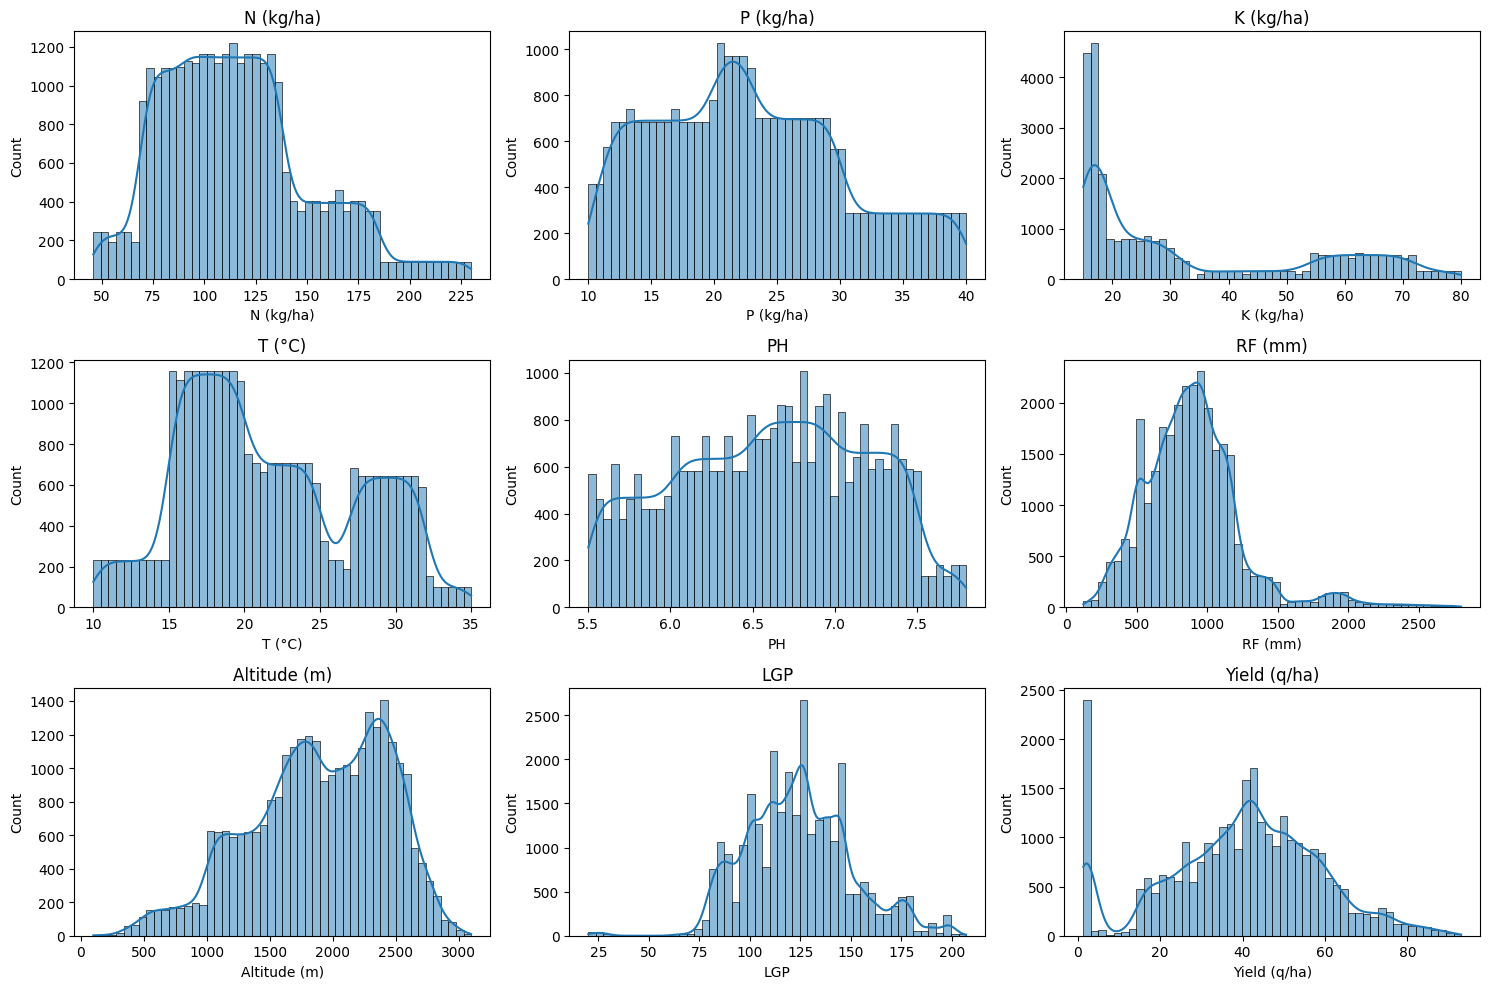

In [25]:

import matplotlib.pyplot as plt
import seaborn as sns

key_vars = ["N (kg/ha)", "P (kg/ha)", "K (kg/ha)", "T (°C)", "PH", "RF (mm)", "Altitude (m)", "LGP", "Yield (q/ha)"]

plt.figure(figsize=(15, 10))
for i, var in enumerate(key_vars, 1):
    plt.subplot(3, 3, i)
    sns.histplot(populated_df[var], bins=50, kde=True)
    plt.title(var)
plt.tight_layout()
plt.show()


# Crop species distribution

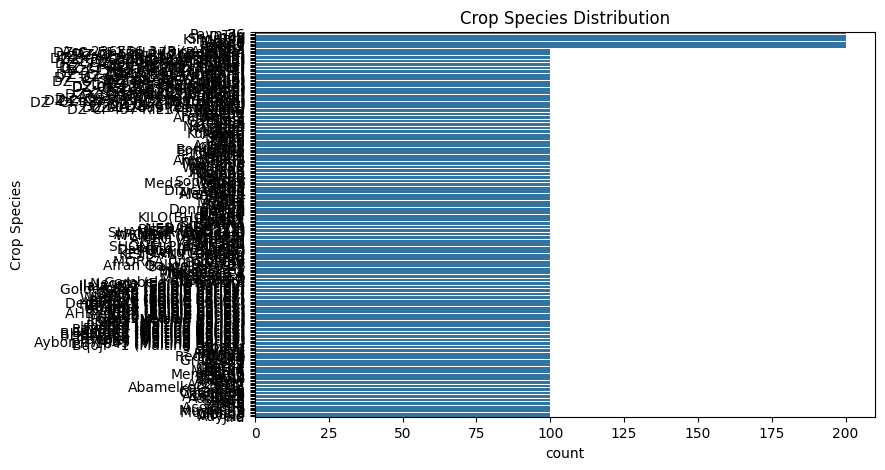

In [26]:

plt.figure(figsize=(8,5))
sns.countplot(data=populated_df, y="Crop Species", order=populated_df["Crop Species"].value_counts().index)
plt.title("Crop Species Distribution")
plt.show()


## Correlation of environmental factors with Yield

Yield (q/ha)    1.000000
LGP             0.416042
T (°C)          0.163175
RF (mm)         0.142896
PH              0.047330
Altitude (m)   -0.063613
Name: Yield (q/ha), dtype: float64


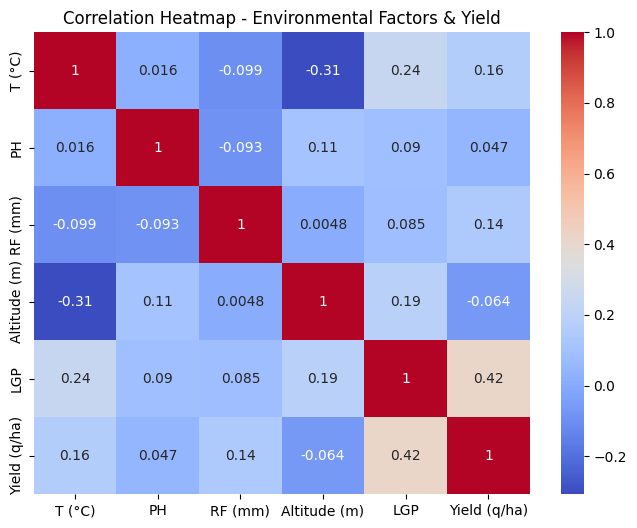

In [27]:

env_factors = ["T (°C)", "PH", "RF (mm)", "Altitude (m)", "LGP"]
correlations = populated_df[env_factors + ["Yield (q/ha)"]].corr()
print(correlations["Yield (q/ha)"].sort_values(ascending=False))

# Heatmap visualization
plt.figure(figsize=(8,6))
sns.heatmap(correlations, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap - Environmental Factors & Yield")
plt.show()


## Nutrient Analysis

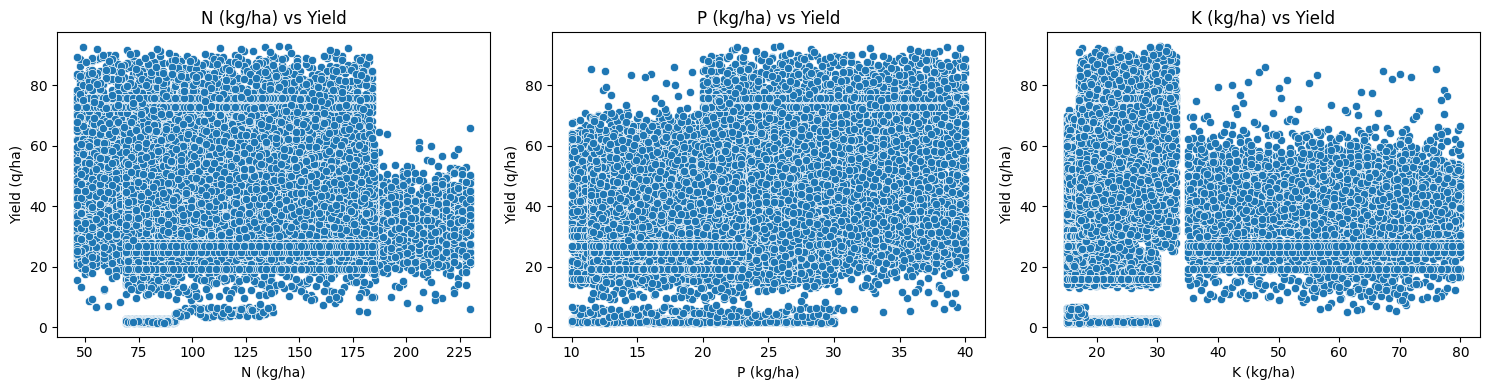

In [28]:

nutrients = ["N (kg/ha)", "P (kg/ha)", "K (kg/ha)"]

plt.figure(figsize=(15, 4))
for i, nutrient in enumerate(nutrients, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(data=populated_df, x=nutrient, y="Yield (q/ha)")
    plt.title(f"{nutrient} vs Yield")
plt.tight_layout()
plt.show()


## Pairwise relationships for numeric variables

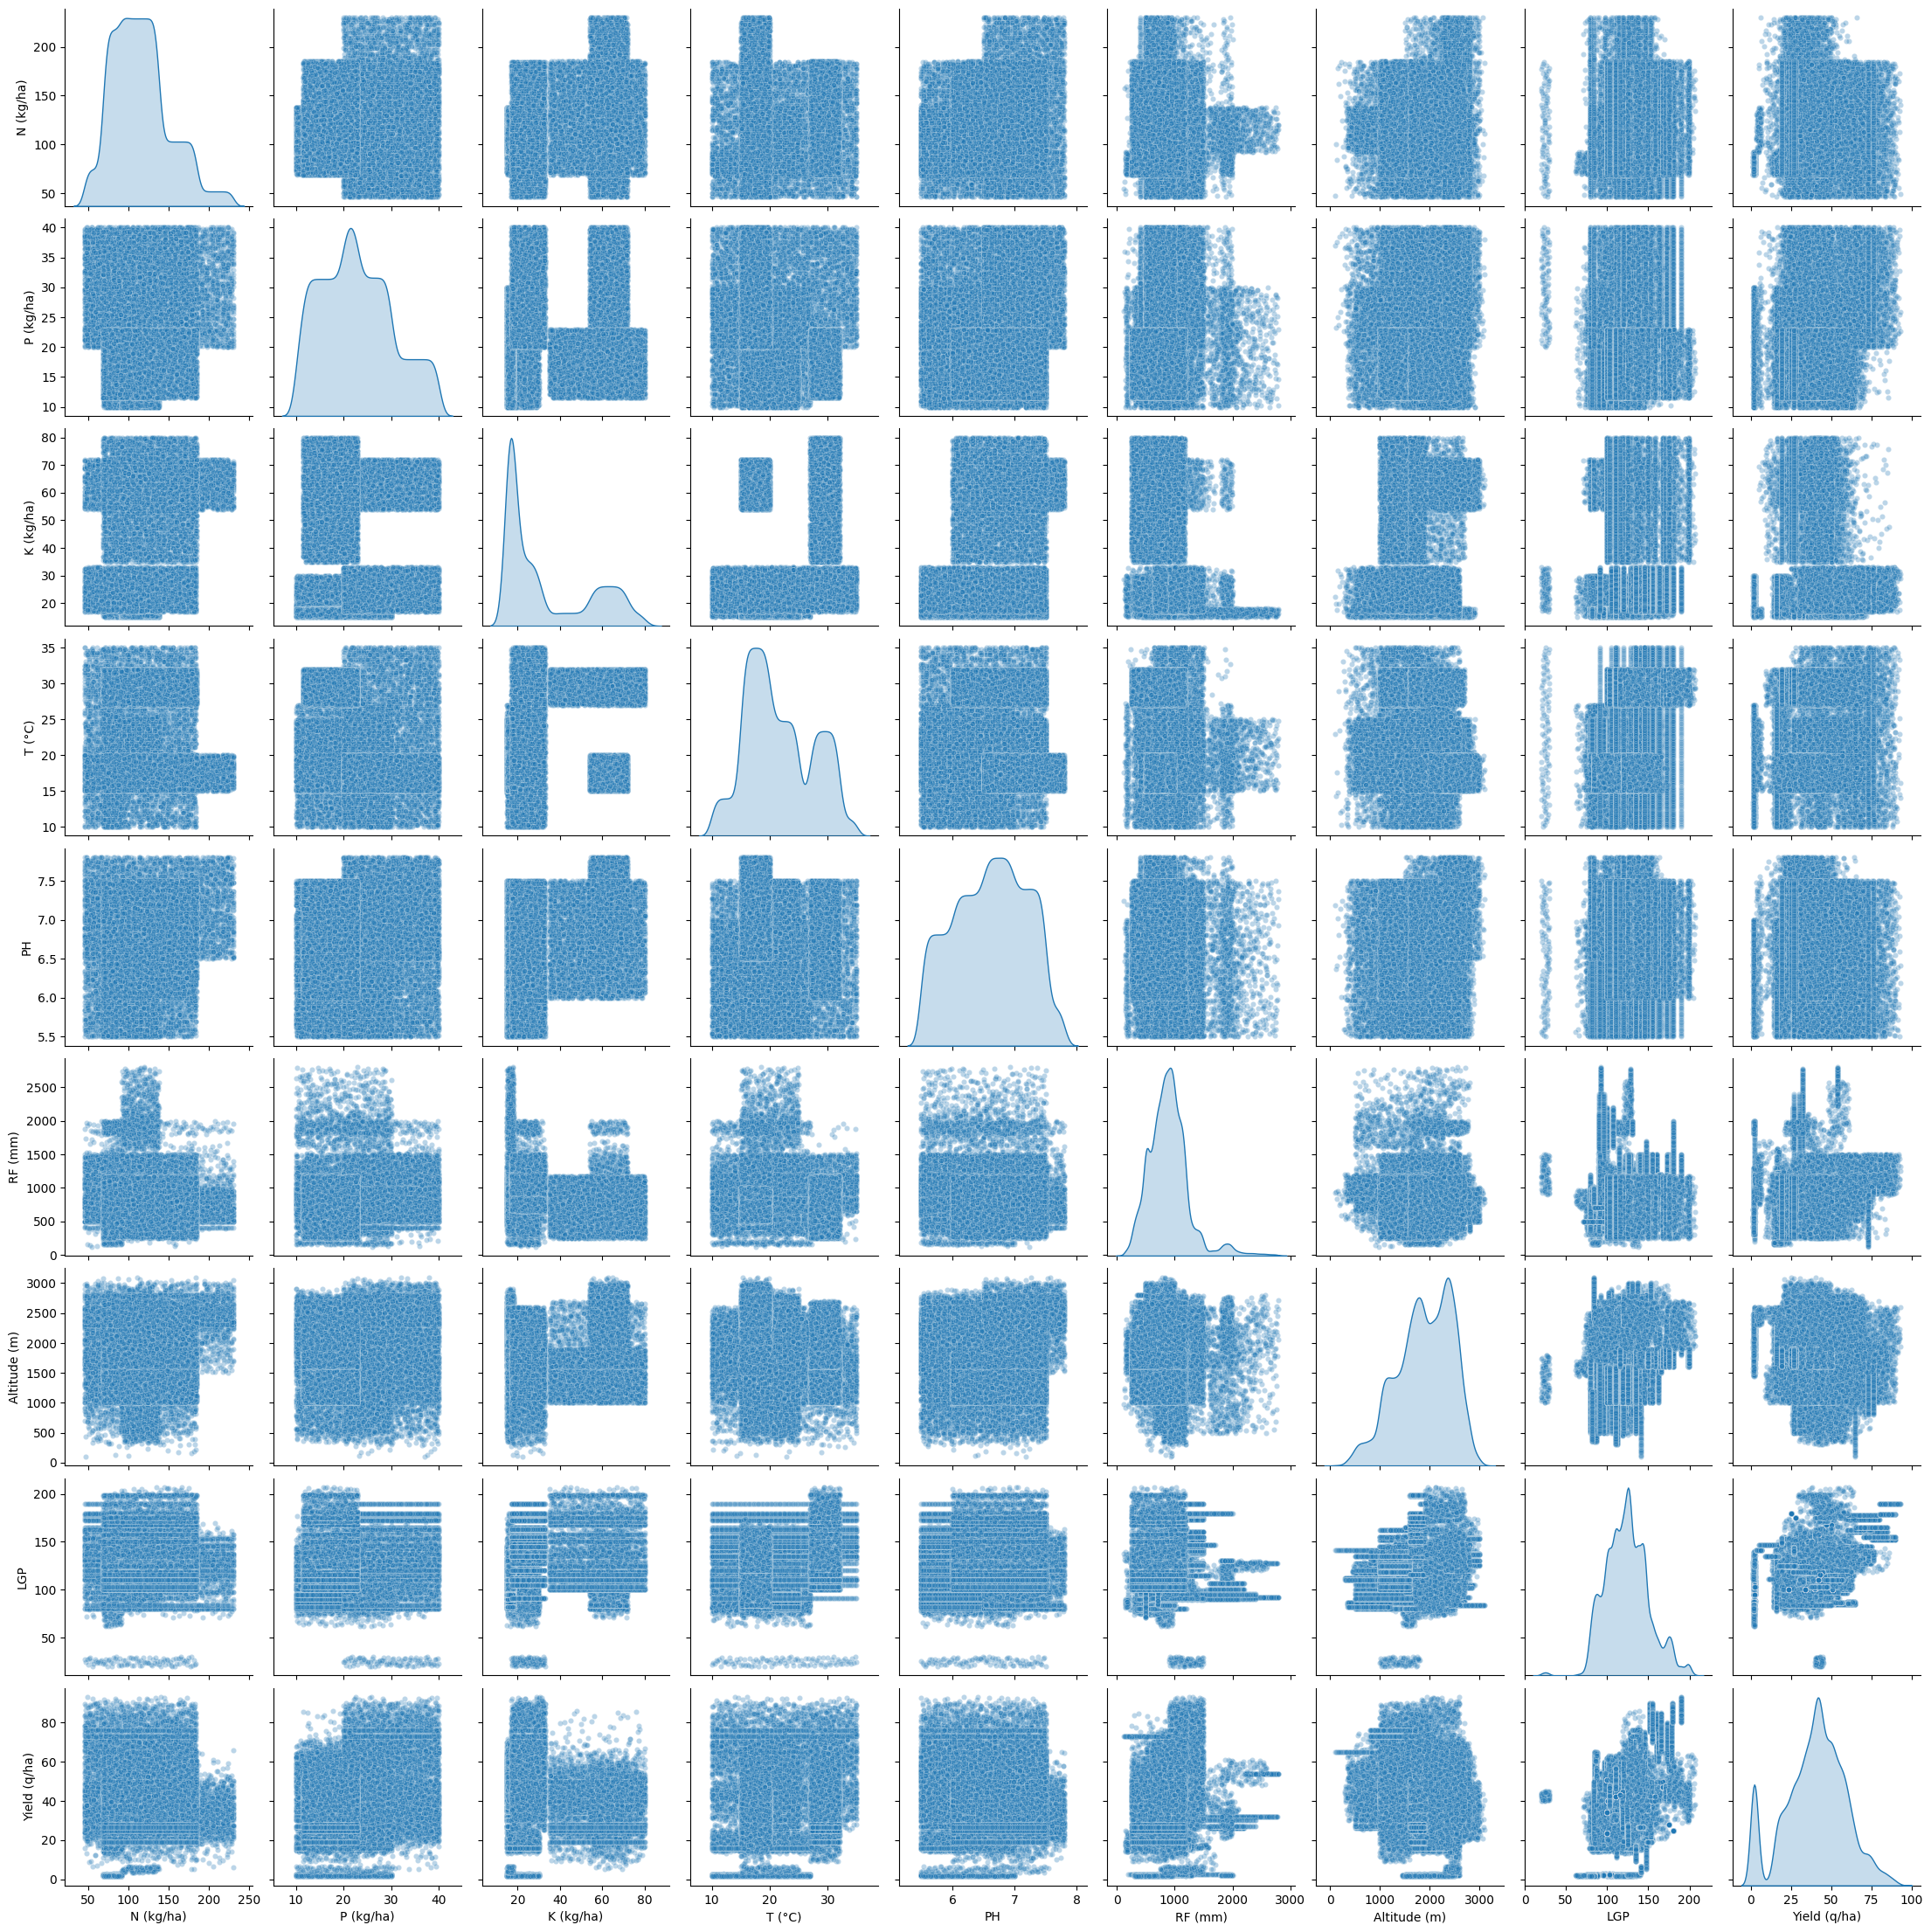

In [29]:

sns.pairplot(populated_df[key_vars], diag_kind="kde", plot_kws={"alpha":0.3, "s":20})
plt.show()


## Yield comparison by Crop Species

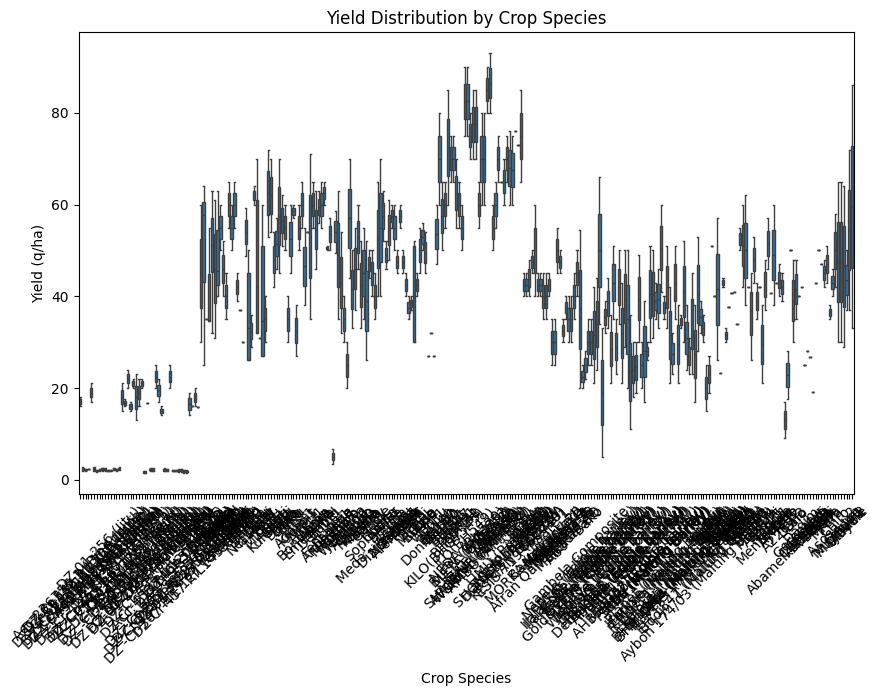

In [30]:

plt.figure(figsize=(10,6))
sns.boxplot(data=populated_df, x="Crop Species", y="Yield (q/ha)")
plt.xticks(rotation=45)
plt.title("Yield Distribution by Crop Species")
plt.show()


## Nutrient vs Yield for Teff

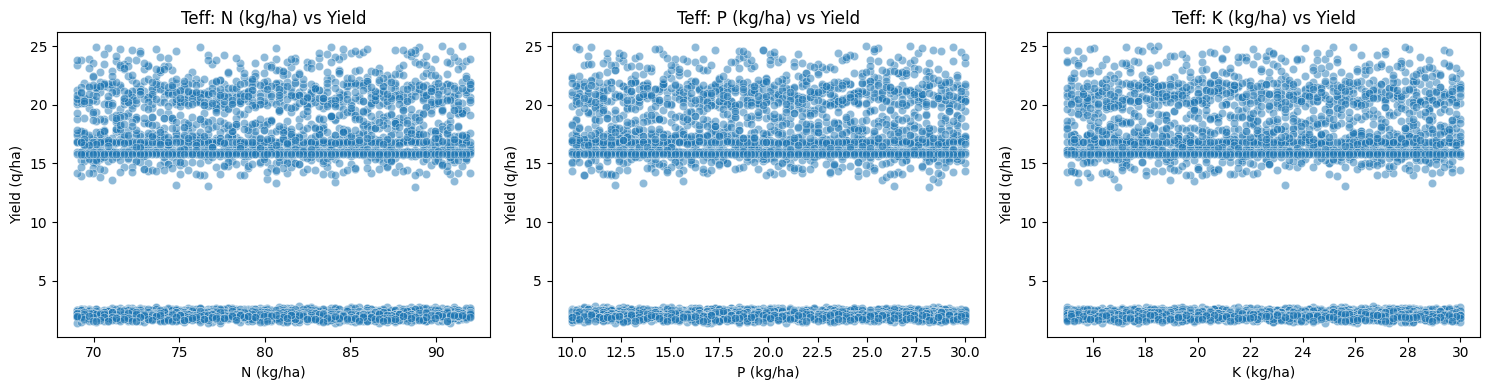

In [31]:
teff_df = populated_df[populated_df["Crop Type"] == "Teff"]

plt.figure(figsize=(15,4))
for i, nutrient in enumerate(["N (kg/ha)", "P (kg/ha)", "K (kg/ha)"], 1):
    plt.subplot(1,3,i)
    sns.scatterplot(data=teff_df, x=nutrient, y="Yield (q/ha)", alpha=0.5)
    plt.title(f"Teff: {nutrient} vs Yield")
plt.tight_layout()
plt.show()


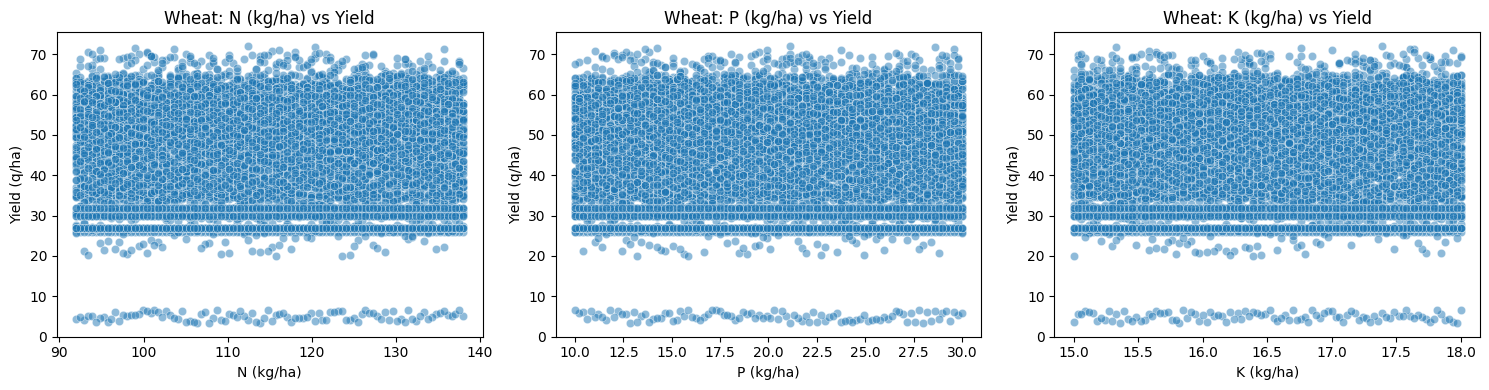

In [32]:
# Nutrient vs Yield for Wheat
wheat_df = populated_df[populated_df["Crop Type"] == "Wheat"]

plt.figure(figsize=(15,4))
for i, nutrient in enumerate(["N (kg/ha)", "P (kg/ha)", "K (kg/ha)"], 1):
    plt.subplot(1,3,i)
    sns.scatterplot(data=wheat_df, x=nutrient, y="Yield (q/ha)", alpha=0.5)
    plt.title(f"Wheat: {nutrient} vs Yield")
plt.tight_layout()
plt.show()


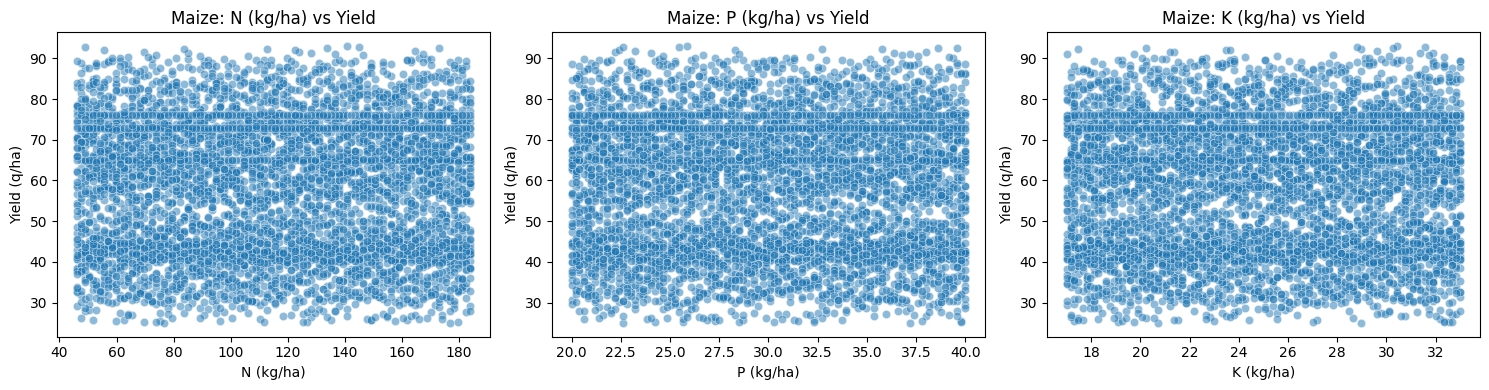

In [33]:
# Nutrient vs Yield for Maize
maize_df = populated_df[populated_df["Crop Type"] == "Maize"]

plt.figure(figsize=(15,4))
for i, nutrient in enumerate(["N (kg/ha)", "P (kg/ha)", "K (kg/ha)"], 1):
    plt.subplot(1,3,i)
    sns.scatterplot(data=maize_df, x=nutrient, y="Yield (q/ha)", alpha=0.5)
    plt.title(f"Maize: {nutrient} vs Yield")
plt.tight_layout()
plt.show()


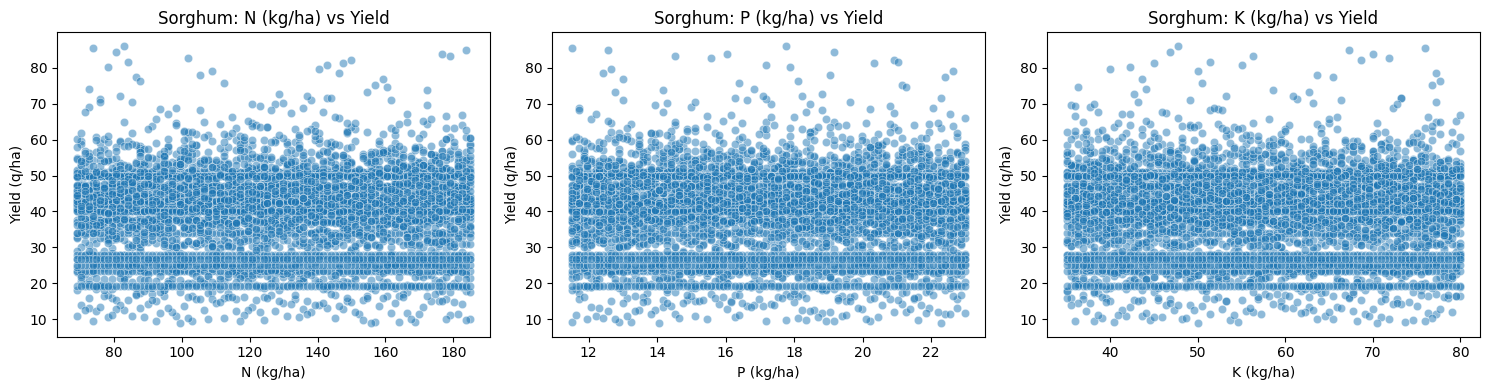

In [34]:
# Nutrient vs Yield for Sorghum
sorghum_df = populated_df[populated_df["Crop Type"] == "Sorghum"]

plt.figure(figsize=(15,4))
for i, nutrient in enumerate(["N (kg/ha)", "P (kg/ha)", "K (kg/ha)"], 1):
    plt.subplot(1,3,i)
    sns.scatterplot(data=sorghum_df, x=nutrient, y="Yield (q/ha)", alpha=0.5)
    plt.title(f"Sorghum: {nutrient} vs Yield")
plt.tight_layout()
plt.show()


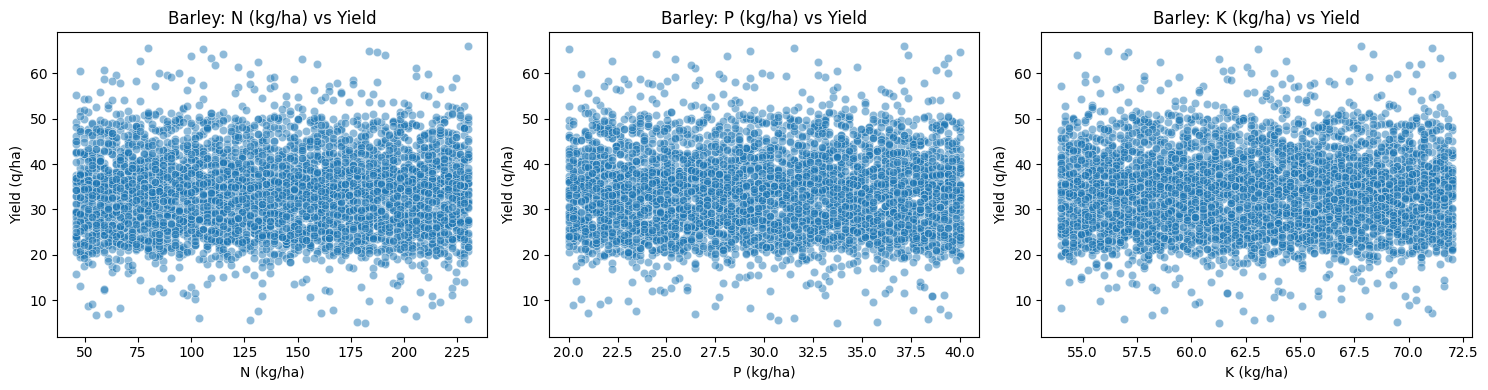

In [35]:
# Nutrient vs Yield for Barley
barley_df = populated_df[populated_df["Crop Type"] == "Barley"]

plt.figure(figsize=(15,4))
for i, nutrient in enumerate(["N (kg/ha)", "P (kg/ha)", "K (kg/ha)"], 1):
    plt.subplot(1,3,i)
    sns.scatterplot(data=barley_df, x=nutrient, y="Yield (q/ha)", alpha=0.5)
    plt.title(f"Barley: {nutrient} vs Yield")
plt.tight_layout()
plt.show()
